In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
train_df = pd.read_csv('../Train_data.csv')

In [14]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [16]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [17]:
train_df['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [18]:
train_df['service'].value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [19]:
train_df['flag'].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

In [20]:
train_df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [22]:
from sklearn.preprocessing import StandardScaler

In [61]:
# labelencoding
from sklearn.preprocessing import LabelEncoder
enc_dict={}
def encoding_label(x):
    le = LabelEncoder()
    r = le.fit_transform(x)
    enc_dict[x.name] = le.classes_
    return r

In [64]:
encodingColumns = X_cat.columns
encodingColumns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [63]:
X_cat = train_df[['protocol_type', 'service', 'flag', 'class']]
# X_cat = train_df.select_dtypes(include=['object'])
# X_cat = pd.get_dummies(X_cat)

In [65]:
X_cat = X_cat[encodingColumns].apply(encoding_label)

In [66]:
scaler = StandardScaler()
X_num = train_df.drop(['protocol_type', 'service', 'flag', 'class'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = train_df['class']

In [67]:
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9,1
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9,1
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5,0
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9,1
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1,16,2,0
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281,1,19,9,0
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1,46,1,0
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,38,5,0


<AxesSubplot:>

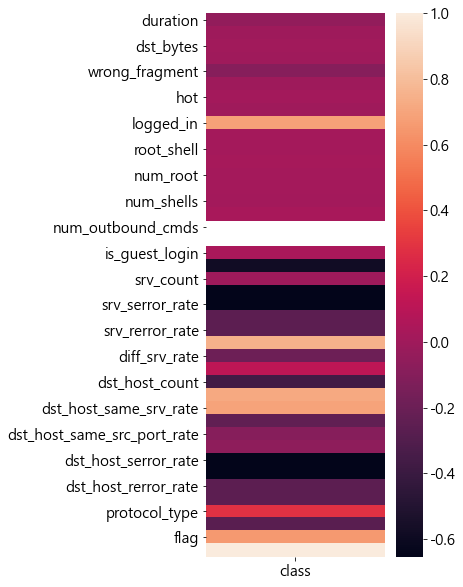

In [68]:
fig = plt.figure(figsize=(4, 10))
# sns.heatmap(X.corr()[['class_normal']])
sns.heatmap(X.corr()[['class']])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\ameri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
from sklearn.metrics import classification_report

In [31]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     anomaly       0.98      0.96      0.97      3507
      normal       0.96      0.98      0.97      4051

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



In [32]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=5)
PCA()
pca.fit(X_train)
X_reduced = pca.fit_transform(X_train)

In [71]:
X_reduced

array([[-3.41435985, -0.22182707, -0.07252455, -4.67342754,  2.95109619],
       [-2.27086137, -0.87115017, -0.14294515,  1.13084645, -0.96877724],
       [-1.99213123, -0.25684287, -0.1231274 , -1.4078861 ,  0.42589843],
       ...,
       [ 4.18563957, -1.44932173,  0.01327759, -0.12094672, -0.01758723],
       [-2.51577268, -0.89808003, -0.14716398,  0.60779975, -0.53538684],
       [ 1.78564138,  5.53586137, -0.13006549,  0.97969316, -1.03707912]])

In [34]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\ameri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     anomaly       0.98      0.96      0.97      3507
      normal       0.96      0.98      0.97      4051

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



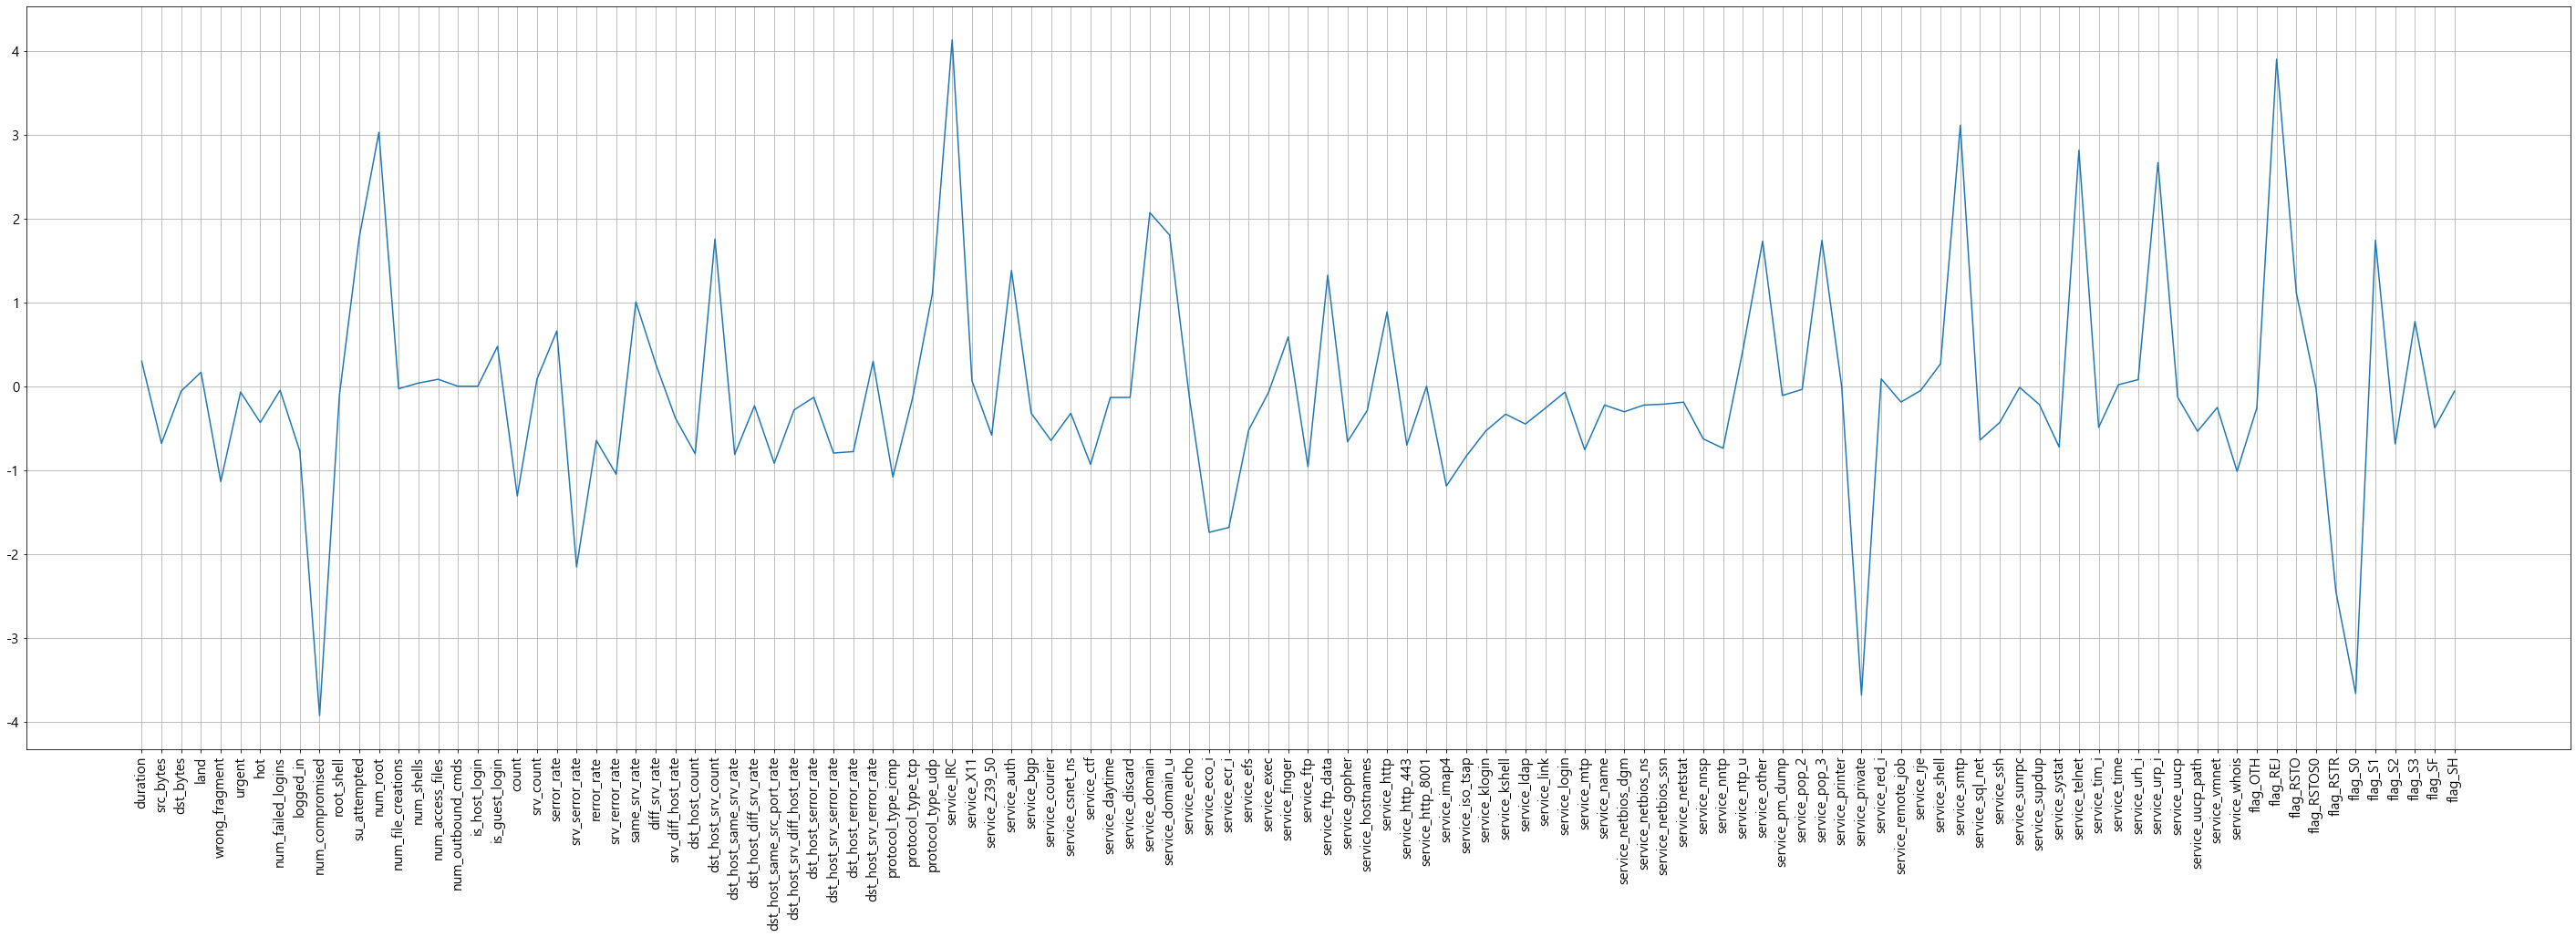

In [42]:
fig = plt.figure(figsize=(50, 15))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.grid()
plt.show()